## Geely Auto Car Price Case Study

Problem Statement:

To understand the factors on which the pricing of cars depends in the American market.

Essentially, the company wants —


- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car.

### Importing and Understanding Data

- Reading files and checking data quality

In [616]:
import pandas as pd
import numpy as np

In [617]:
# Importing Housing.csv
CarPrice = pd.read_csv('CarPrice_Assignment.csv')

In [618]:
# Looking at the first five rows
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [619]:
# check what type of values are stored in the columns
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [620]:
# Verify missing data
CarPrice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [621]:
#checking for missing data across row if anything is completely missing will remove that row
CarPrice.isnull().all(axis=0).sum()

0

### Data Cleaning and Creating new Variable/Metric

- Car_ID field is unique observation ID and will have no significance on price for our model ,So will drop it
- As per case we need only Company name from carname field, So will split values and get compnay name in different col

In [622]:
CarPrice = CarPrice.drop('car_ID',axis = 1)

In [623]:
#Getting company name from Carname column and dropping Carname col
CarPrice['CarName'] = CarPrice['CarName'].str.lower()
CarPrice['CompanyName'] = CarPrice['CarName'].str.split(' ').str[0]
CarPrice = CarPrice.drop('CarName',axis = 1)

In [624]:
#Checking data of Company name column by taking unique values
CarPrice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### There are some spelling error in Company name like 'maxda' and 'mazda, 'porsche' and 'porcshce'' etc, Will convert them to unique values

##### 4 changes are : maxda to mazda, porcshce to porsche, toyouta to toyota, vokswagen and vw to volkswagen

In [625]:
CarPrice = CarPrice.replace('maxda', 'mazda')
CarPrice = CarPrice.replace('porcshce', 'porsche')
CarPrice = CarPrice.replace('toyouta', 'toyota')
CarPrice = CarPrice.replace('vokswagen', 'volkswagen')
CarPrice = CarPrice.replace('vw', 'volkswagen')
CarPrice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [626]:
#Creating new metric milageratio as citympg/highwaympg and powerratio as horsepower/curbweight to evaluate performance of car

CarPrice['Milageratio'] = CarPrice['citympg']/CarPrice['highwaympg']
CarPrice['Powerratio'] = CarPrice['horsepower']/CarPrice['curbweight']

In [627]:
#Check DF 
CarPrice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,Milageratio,Powerratio
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0.777778,0.043564
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0.777778,0.043564
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0.730769,0.054552
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,audi,0.800000,0.043646
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,0.818182,0.040722


### Step_2: Visualising Data (EDA)
- Will Plot scatter plot for numerical and bar graph for categorical column to see relationship with price

In [628]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [629]:
CarPrice.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Milageratio,Powerratio
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.815670,0.040063
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.058449,0.009570
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.607143,0.019936
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.791667,0.034188
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,0.812500,0.037801
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,0.843750,0.044489
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,0.085561


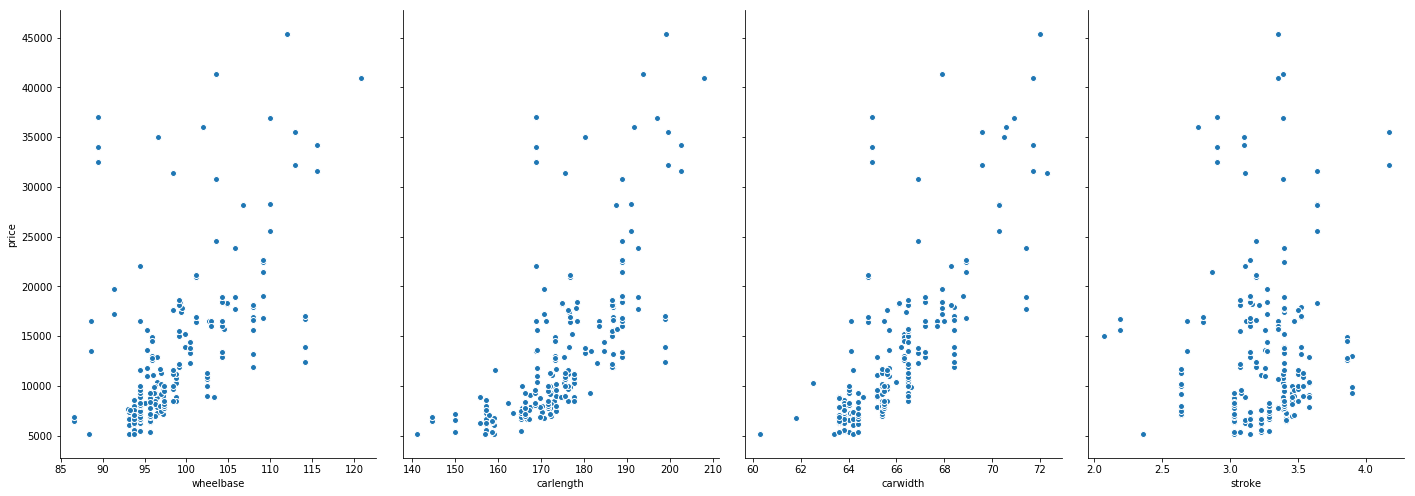

In [630]:
# Visualise the relationship between the numeric features and the price using scatterplots
sns.pairplot(CarPrice, x_vars=[ 'wheelbase','carlength', 'carwidth', 'stroke'], y_vars='price',size=7,aspect=0.7, kind='scatter')

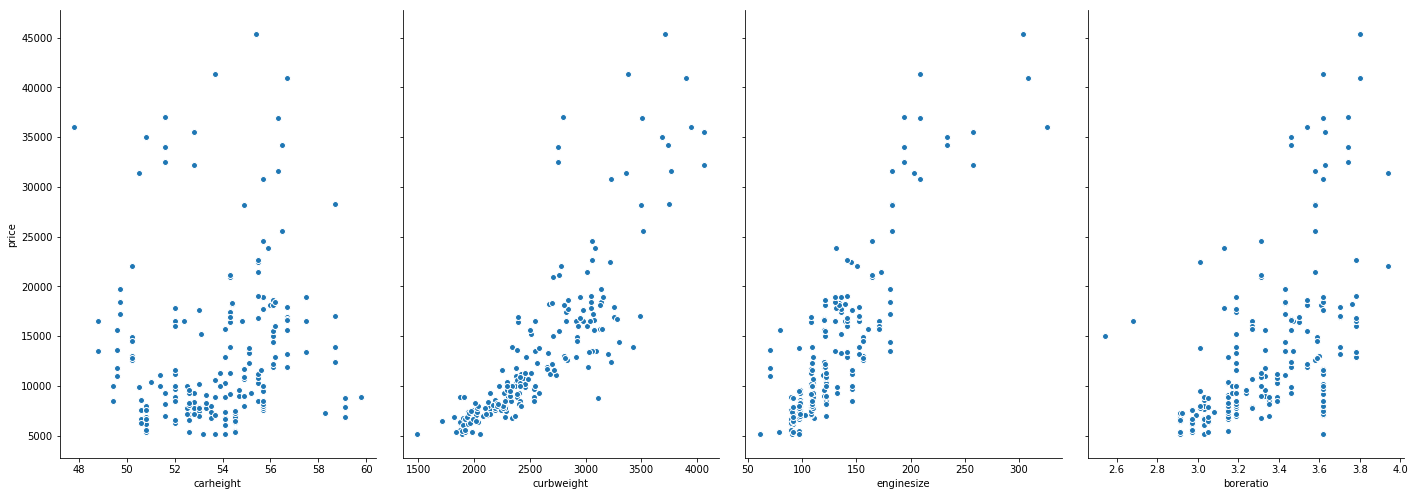

In [631]:
sns.pairplot(CarPrice, x_vars=[ 'carheight','curbweight','enginesize','boreratio'], y_vars='price',size=7,aspect=0.7, kind='scatter')

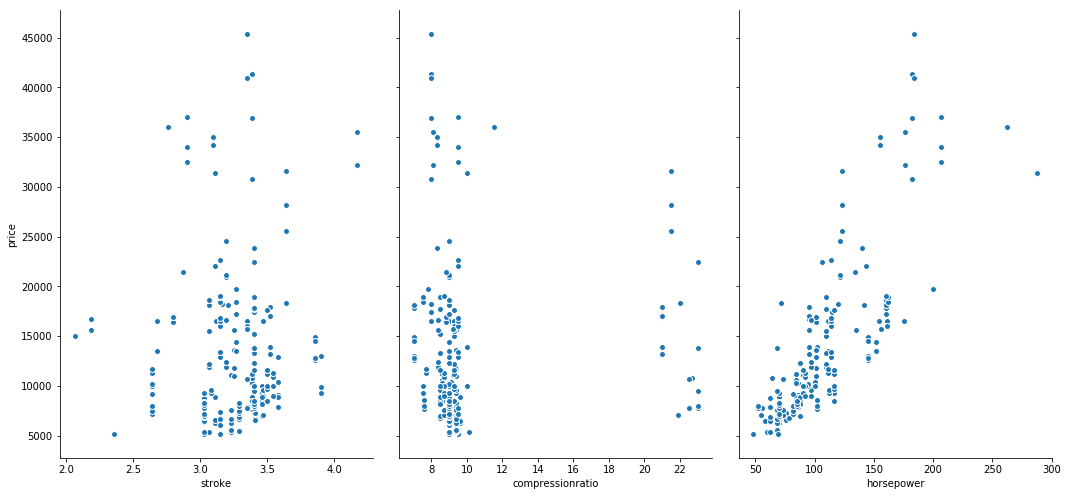

In [632]:
sns.pairplot(CarPrice, x_vars=[ 'stroke','compressionratio','horsepower'], y_vars='price',size=7,aspect=0.7, kind='scatter')

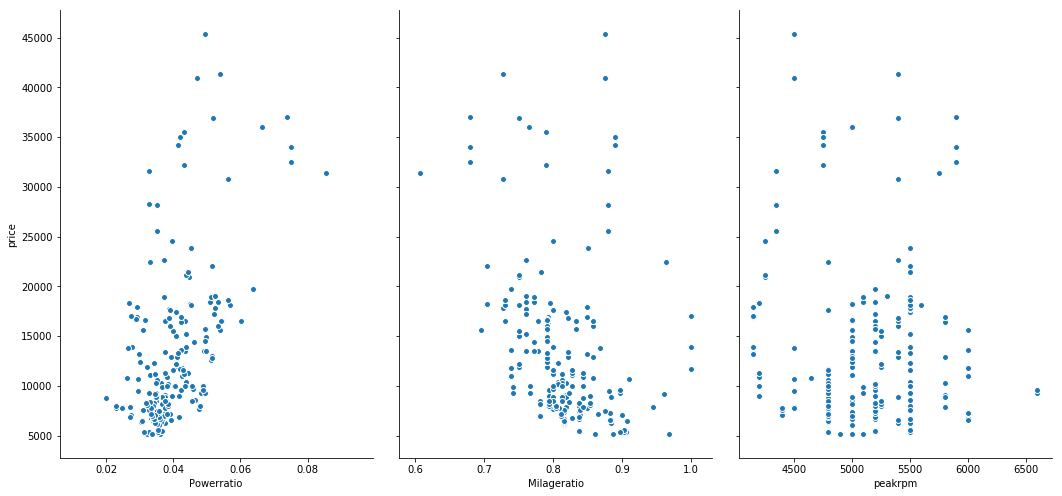

In [633]:
sns.pairplot(CarPrice, x_vars=[ 'Powerratio','Milageratio','peakrpm'], y_vars='price',size=7,aspect=0.7, kind='scatter')

#### Observation of Scatter plot
- From above plots apart from Car height,Stroke,peakrpm and compression ratio rest all column showing fair linear plot,but will take all these column to next level(RFE) to see there significance before dropping them.
- There are some outlier visible in all column will remove them taking quantile of 95%.

In [695]:
m1 = CarPrice.carheight.quantile(0.99)
m2 = CarPrice.carheight.quantile(0.01)

m2

49.22

In [634]:
# Removing outlier which are not in 1%-99% range using quantile
# for wheelbase
m1 = CarPrice.wheelbase.quantile(0.99)
m2 = CarPrice.wheelbase.quantile(0.01)
CarPrice = CarPrice[(CarPrice.wheelbase >= m2) & (CarPrice.wheelbase <= m1)]

#For carlength

m1 = CarPrice.carlength.quantile(0.99)
m2 = CarPrice.carlength.quantile(0.01)
CarPrice = CarPrice[(CarPrice.carlength >= m2) & (CarPrice.carlength <= m1)]

#For carwidth

m1 = CarPrice.carwidth.quantile(0.99)
m2 = CarPrice.carwidth.quantile(0.01)
CarPrice = CarPrice[(CarPrice.carwidth >= m2) & (CarPrice.carwidth <= m1)]

#For stroke

m1 = CarPrice.stroke.quantile(0.99)
m2 = CarPrice.stroke.quantile(0.01)
CarPrice = CarPrice[(CarPrice.stroke >= m2) & (CarPrice.stroke <= m1)]
                    
#For carheight

m1 = CarPrice.carheight.quantile(0.99)
m2 = CarPrice.carheight.quantile(0.01)
CarPrice = CarPrice[(CarPrice.carheight >= m2) & (CarPrice.carheight <= m1)]
                    
#For curbweight

m1 = CarPrice.curbweight.quantile(0.99)
m2 = CarPrice.curbweight.quantile(0.01)
CarPrice = CarPrice[(CarPrice.curbweight >= m2) & (CarPrice.curbweight <= m1)]
                    
#For enginesize

m1 = CarPrice.enginesize.quantile(0.99)
m2 = CarPrice.enginesize.quantile(0.01)
CarPrice = CarPrice[(CarPrice.enginesize >= m2) & (CarPrice.enginesize <= m1)]
                    
#For boreratio

m1 = CarPrice.boreratio.quantile(0.99)
m2 = CarPrice.boreratio.quantile(0.01)
CarPrice = CarPrice[(CarPrice.boreratio >= m2) & (CarPrice.boreratio <= m1)]

#For compressionratio

m1 = CarPrice.compressionratio.quantile(0.99)
m2 = CarPrice.compressionratio.quantile(0.01)
CarPrice = CarPrice[(CarPrice.compressionratio >= m2) & (CarPrice.compressionratio <= m1)]

#For horsepower

m1 = CarPrice.horsepower.quantile(0.99)
m2 = CarPrice.horsepower.quantile(0.01)
CarPrice = CarPrice[(CarPrice.horsepower >= m2) & (CarPrice.horsepower <= m1)]

#For peakrpm

m1 = CarPrice.peakrpm.quantile(0.99)
m2 = CarPrice.peakrpm.quantile(0.01)
CarPrice = CarPrice[(CarPrice.peakrpm >= m2) & (CarPrice.peakrpm <= m1)]

#For citympg

m1 = CarPrice.citympg.quantile(0.99)
m2 = CarPrice.citympg.quantile(0.01)
CarPrice = CarPrice[(CarPrice.citympg >= m2) & (CarPrice.citympg <= m1)]

#For highwaympg

m1 = CarPrice.highwaympg.quantile(0.99)
m2 = CarPrice.highwaympg.quantile(0.01)
CarPrice = CarPrice[(CarPrice.highwaympg >= m2) & (CarPrice.highwaympg <= m1)]

#For price

#m1 = CarPrice.price.quantile(0.99)
#m2 = CarPrice.price.quantile(0.01)
#CarPrice = CarPrice[(CarPrice.price >= m2) & (CarPrice.price <= m1)]

#For Milageratio

m1 = CarPrice.Milageratio.quantile(0.99)
m2 = CarPrice.Milageratio.quantile(0.01)
CarPrice = CarPrice[(CarPrice.Milageratio >= m2) & (CarPrice.Milageratio <= m1)]

#For Powerratio

m1 = CarPrice.Powerratio.quantile(0.99)
m2 = CarPrice.Powerratio.quantile(0.01)
CarPrice = CarPrice[(CarPrice.Powerratio >= m2) & (CarPrice.Powerratio <= m1)]


In [635]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 204
Data columns (total 27 columns):
symboling           171 non-null int64
fueltype            171 non-null object
aspiration          171 non-null object
doornumber          171 non-null object
carbody             171 non-null object
drivewheel          171 non-null object
enginelocation      171 non-null object
wheelbase           171 non-null float64
carlength           171 non-null float64
carwidth            171 non-null float64
carheight           171 non-null float64
curbweight          171 non-null int64
enginetype          171 non-null object
cylindernumber      171 non-null object
enginesize          171 non-null int64
fuelsystem          171 non-null object
boreratio           171 non-null float64
stroke              171 non-null float64
compressionratio    171 non-null float64
horsepower          171 non-null int64
peakrpm             171 non-null int64
citympg             171 non-null int64
highwaympg    

- We lost around 20% of data (40 rows) with above outlier fixing code (205 - 165)

### Plotting Bar graph for categorical columns

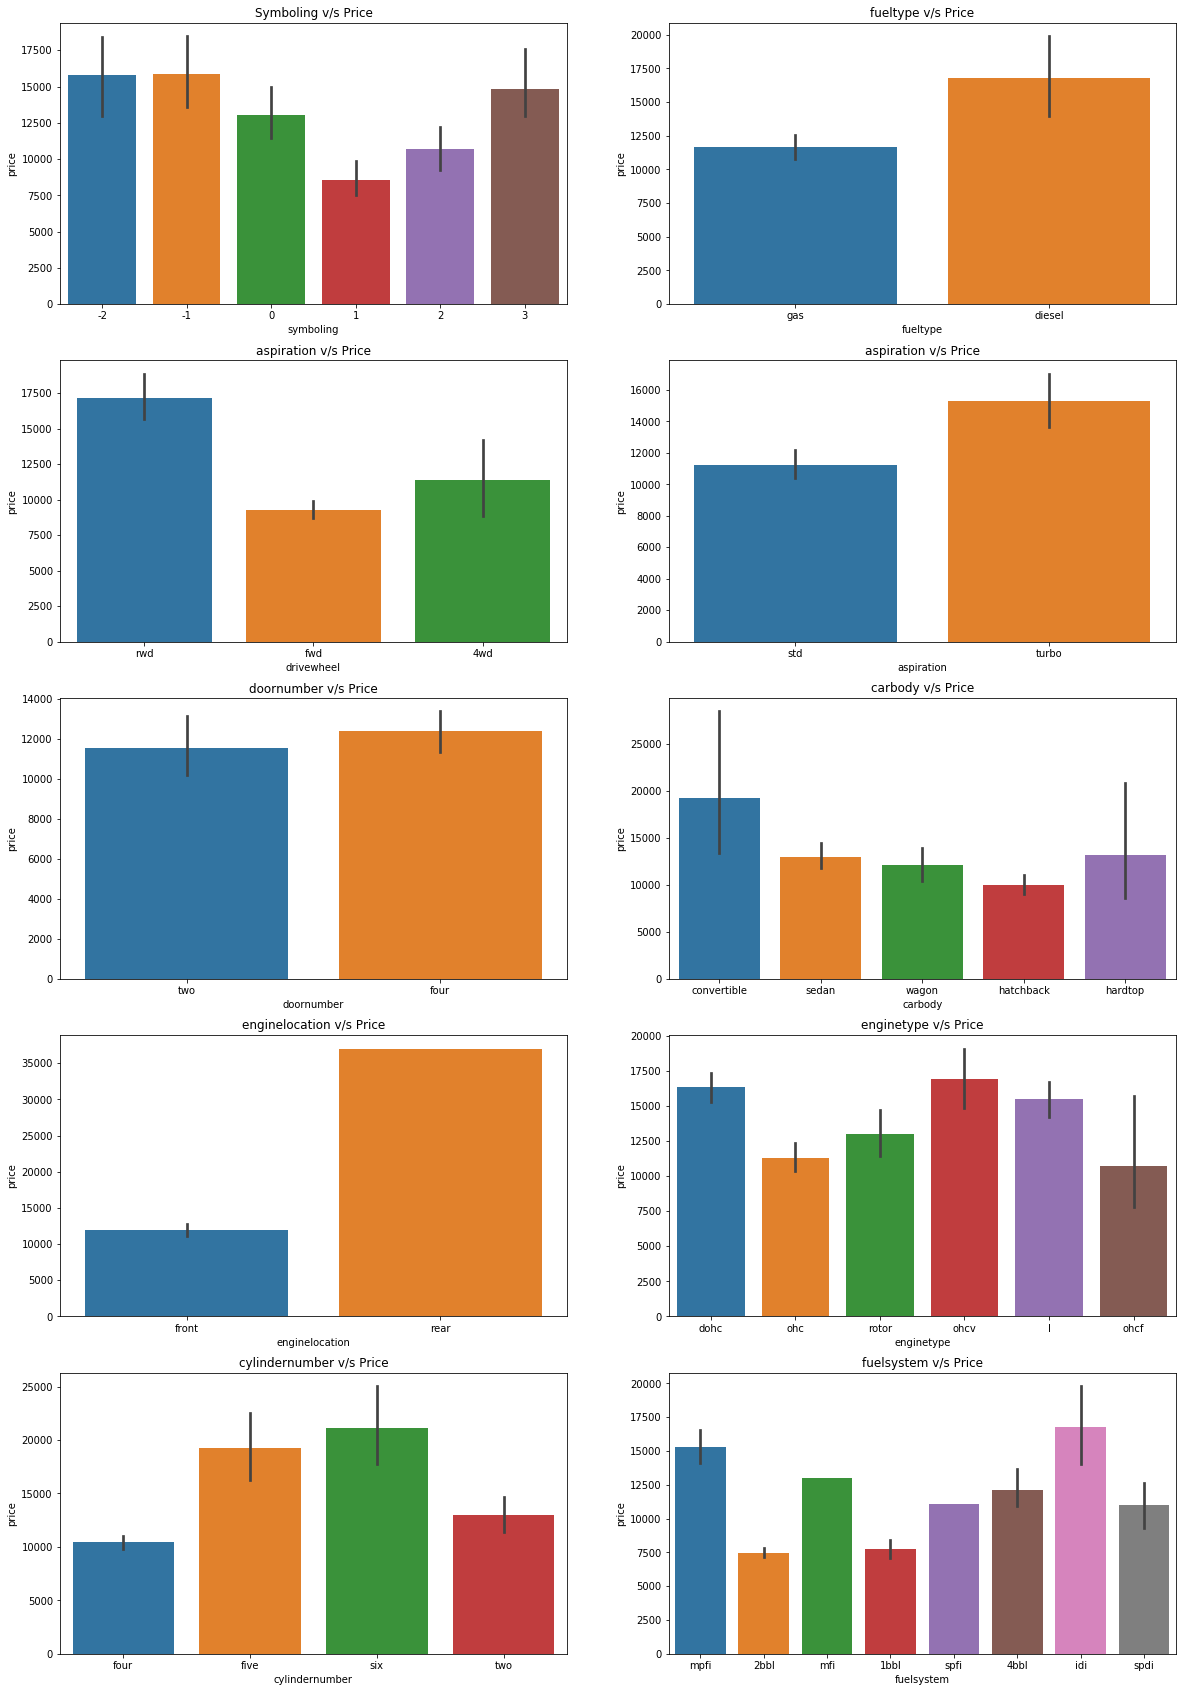

In [636]:
plt.figure(figsize=(20,30))

# subplot 1: Symboling v/s Price
plt.subplot(5, 2, 1)
sns.barplot(y='price', x='symboling', data = CarPrice)
plt.title("Symboling v/s Price")

# subplot 2: Fueltype any v/s Pricent
plt.subplot(5, 2, 2)
sns.barplot(y='price', x='fueltype', data = CarPrice)
plt.title("fueltype v/s Price")

# subplot 3: drivewheel any v/s Price
plt.subplot(5, 2, 3)
sns.barplot(y='price', x='drivewheel', data = CarPrice)
plt.title("aspiration v/s Price")


# subplot 4: aspiration any v/s Price
plt.subplot(5, 2, 4)
sns.barplot(y='price', x='aspiration', data = CarPrice)
plt.title("aspiration v/s Price")

# subplot 5: doornumber any v/s Price
plt.subplot(5, 2, 5)
sns.barplot(y='price', x='doornumber', data = CarPrice)
plt.title("doornumber v/s Price")

# subplot 6: carbody any v/s Price
plt.subplot(5, 2, 6)
sns.barplot(y='price', x='carbody', data = CarPrice)
plt.title("carbody v/s Price")

# subplot : enginelocation any v/s Price
plt.subplot(5, 2, 7)
sns.barplot(y='price', x='enginelocation', data = CarPrice)
plt.title("enginelocation v/s Price")

# subplot : enginetype any v/s Price
plt.subplot(5, 2, 8)
sns.barplot(y='price', x='enginetype', data = CarPrice)
plt.title("enginetype v/s Price")

# subplot : enginetype any v/s Price
plt.subplot(5, 2, 9)
sns.barplot(y='price', x='cylindernumber', data = CarPrice)
plt.title("cylindernumber v/s Price")

# subplot : fuelsystem any v/s Price
plt.subplot(5, 2, 10)
sns.barplot(y='price', x='fuelsystem', data = CarPrice)
plt.title("fuelsystem v/s Price")
plt.show()

#### Observation of categorical features
- Apart from Door number all feature have some impact on Price of car, but will confirm our observation after next level analysis(RFE) and will drop it afterwards.

### Data Preparation

- We have many columns with categorical values.We will convert them to 1s and 0s for 2 level
- For more than 2 level (multilevel) will create dummy variables

In [637]:
#Getting all columns
CarPrice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName',
       'Milageratio', 'Powerratio'],
      dtype='object')

In [638]:
#Checking Column values and Picking col with level 2 (i.e. have only 2 values)
CarPrice['fueltype'].unique()
CarPrice['aspiration'].unique()
CarPrice['doornumber'].unique()
CarPrice['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [639]:
#Converting required col to str dtype and removing leading and trailing space
CarPrice['fueltype'] = CarPrice.fueltype.astype(str)
CarPrice['fueltype'] = CarPrice.fueltype.str.strip()
CarPrice['aspiration'] = CarPrice.aspiration.astype(str)
CarPrice['aspiration'] = CarPrice.aspiration.str.strip()
CarPrice['doornumber'] =  CarPrice.doornumber.astype(str)
CarPrice['doornumber'] = CarPrice.doornumber.str.strip()
CarPrice['enginelocation'] = CarPrice.enginelocation.astype(str)
CarPrice['enginelocation'] = CarPrice.enginelocation.str.strip()

In [640]:
# Converting 2 level categorical to 1 and 0
CarPrice['fueltype'] = CarPrice['fueltype'].map({'gas': 1, 'diesel': 0})
CarPrice['aspiration'] = CarPrice['aspiration'].map({'std': 1, 'turbo': 0})
CarPrice['doornumber'] = CarPrice['doornumber'].map({'two': 1, 'four': 0})
CarPrice['enginelocation'] = CarPrice['enginelocation'].map({'front': 1, 'rear': 0})
CarPrice = CarPrice.fillna(0)

In [641]:
# Checking DF
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 204
Data columns (total 27 columns):
symboling           171 non-null int64
fueltype            171 non-null int64
aspiration          171 non-null int64
doornumber          171 non-null int64
carbody             171 non-null object
drivewheel          171 non-null object
enginelocation      171 non-null int64
wheelbase           171 non-null float64
carlength           171 non-null float64
carwidth            171 non-null float64
carheight           171 non-null float64
curbweight          171 non-null int64
enginetype          171 non-null object
cylindernumber      171 non-null object
enginesize          171 non-null int64
fuelsystem          171 non-null object
boreratio           171 non-null float64
stroke              171 non-null float64
compressionratio    171 non-null float64
horsepower          171 non-null int64
peakrpm             171 non-null int64
citympg             171 non-null int64
highwaympg        

#### Rest of the variable have more than 2 level so creating Dummy variable for them

In [642]:
status1 = pd.get_dummies(CarPrice['symboling'],prefix='symboling',drop_first=True)
status2 = pd.get_dummies(CarPrice['carbody'],prefix='carbody',drop_first=True)
status3 = pd.get_dummies(CarPrice['drivewheel'],prefix='drivewheel',drop_first=True)
status4 = pd.get_dummies(CarPrice['enginetype'],prefix='enginetype',drop_first=True)
status5 = pd.get_dummies(CarPrice['cylindernumber'],prefix='cylindernumber',drop_first=True)
status6 = pd.get_dummies(CarPrice['fuelsystem'],prefix='fuelsystem',drop_first=True)
status7 = pd.get_dummies(CarPrice['CompanyName'],prefix='CompanyName',drop_first=True)

In [643]:
# The result has created three variables that are not needed.
status2.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,0,0,0,0
1,0,0,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0


In [644]:
#Adding the results to the master dataframe
CarPrice = pd.concat([CarPrice,status1],axis=1)
CarPrice = pd.concat([CarPrice,status2],axis=1)
CarPrice = pd.concat([CarPrice,status3],axis=1)
CarPrice = pd.concat([CarPrice,status4],axis=1)
CarPrice = pd.concat([CarPrice,status5],axis=1)
CarPrice = pd.concat([CarPrice,status6],axis=1)
CarPrice = pd.concat([CarPrice,status7],axis=1)

In [645]:
# Now let's see the head of our dataframe.
CarPrice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0
5,2,1,1,1,sedan,fwd,1,99.8,177.3,66.3,...,0,0,0,0,0,0,0,0,0,0


In [646]:
#Dropping col which have dummy variable now and creating final DF
CarPrice_Final = CarPrice.drop('symboling',axis = 1)
CarPrice_Final = CarPrice_Final.drop('carbody',axis = 1)
CarPrice_Final = CarPrice_Final.drop('drivewheel',axis = 1)
CarPrice_Final = CarPrice_Final.drop('enginetype',axis = 1)
CarPrice_Final = CarPrice_Final.drop('cylindernumber',axis = 1)
CarPrice_Final = CarPrice_Final.drop('fuelsystem',axis = 1)
CarPrice_Final = CarPrice_Final.drop('CompanyName',axis = 1)

### Rescaling the Features 
- To have a comparable scale for all variables will use normalisation

In [647]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
CarPrice_Final = CarPrice_Final.apply(normalize) 

## Splitting Data into Training and Testing Sets

In [648]:
CarPrice_Final.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'Milageratio', 'Powerratio',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'Co

In [697]:
# Putting feature variable to X
X = CarPrice_Final[['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'Milageratio', 'Powerratio',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
       'CompanyName_nissan', 'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen',
       'CompanyName_volvo']]

# Putting response variable to y
y = CarPrice_Final['price']

In [698]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

## Model Refinement Using RFE

- We have very high number of variable (around 70 independent variable), will use RFE to pick top 30 variable first

In [699]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
rfe = RFE(lm, 30)

rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True False False  True  True  True False  True False  True  True False
  True  True  True  True  True  True  True False False False False False
 False False False False False False False False  True False  True  True
 False  True False  True  True False False False False  True  True  True
 False  True False False False  True  True False False  True  True False
  True False False False  True]
[ 1 29 18  1  1  1 14  1 13  1  1 12  1  1  1  1  1  1  1 16 17 34 27 22
 19 15 21 20 35 32  7  8  1 10  1  1  4  1  5  1  1 31 28 30 23  1  1  1
 36  1  2 24 25  1  1 26  9  1  1  3  1  6 11 33  1]


In [700]:
col = X_train.columns[rfe.support_]

## Building a linear model

#### Model-1 with 30 Variable

In [701]:
X_train = X_train[col]

In [702]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm = sm.OLS(y_train,X_train).fit()

In [703]:
#Let's see the summary of our first linear model with all 30 varible will start refining afterwards
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     60.83
Date:                Mon, 13 Aug 2018   Prob (F-statistic):           5.10e-47
Time:                        17:49:00   Log-Likelihood:                 213.77
No. Observations:                 119   AIC:                            -373.5
Df Residuals:                      92   BIC:                            -298.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

- R-square and Adj.R square are quite high but P values are high too which makes many variable insignificant, so will refine our model dropping some more column using RFE one more time taking 15 variable only

In [704]:
lm_1 = LinearRegression()
rfe = RFE(lm_1, 15)
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

col = X_train.columns[rfe.support_]

[False False  True  True  True False  True  True False  True False  True
  True  True  True False False False False False  True False  True  True
 False False False False  True False  True]
[13 17  1  1  1 16  1  1 15  1  4  1  1  1  1  7 12  9 11  8  1 14  1  1
 10  3  5  6  1  2  1]


 #### Model-2 with 15 Variable

In [705]:
X_train.columns

Index(['const', 'fueltype', 'enginelocation', 'wheelbase', 'carlength',
       'carheight', 'enginesize', 'boreratio', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Milageratio',
       'Powerratio', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_four', 'cylindernumber_two', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'CompanyName_audi', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_dodge', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_plymouth', 'CompanyName_porsche',
       'CompanyName_saab', 'CompanyName_volvo'],
      dtype='object')

In [706]:
X_train = X_train[col]

import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()


print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     85.36
Date:                Mon, 13 Aug 2018   Prob (F-statistic):           2.36e-50
Time:                        17:49:02   Log-Likelihood:                 191.40
No. Observations:                 119   AIC:                            -352.8
Df Residuals:                     104   BIC:                            -311.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4095    

#### From final 15 variable model below are observation
- We got very high P value for Carlenght, engine size, engine location, wheel base and company volvo
- R square and adj R square are good but we need to drop more variable as many coeff are negative

### Checking VIF

In [707]:
# Function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [708]:
X_train.columns

Index(['const', 'enginelocation', 'wheelbase', 'carlength', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'Milageratio',
       'Powerratio', 'fuelsystem_idi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_porsche', 'CompanyName_volvo'],
      dtype='object')

In [710]:
# Keeping only 15 col which we got from RFE in our CarModel df

cols = [col for col in CarPrice_Final.columns if col in ['enginelocation', 'wheelbase', 'carlength', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'Milageratio',
       'Powerratio', 'fuelsystem_idi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_porsche', 'CompanyName_volvo','price']]
CarModel = CarPrice_Final[cols]

- We have CarModel DF ready with final 15 variables after applying RFE, now will refine more on basis of VIF and P value

In [711]:
# Calculating Vif value
vif_cal(input_data= CarModel, dependent_col="price")

,Var,Vif
6,citympg,539.79
7,highwaympg,425.48
0,enginelocation,154.25
5,horsepower,53.81
8,Milageratio,44.08
9,Powerratio,24.82
2,carlength,7.90
3,enginesize,6.71
1,wheelbase,5.26
10,fuelsystem_idi,2.28


#### Observation:
- We have around 9 variable with very high VIF values
- By maching P value from model created above we have engine size,car length have high p value, So we can remove them but will check Correlation matrix first to check there interdependency.

## Correlation matrix

In [712]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

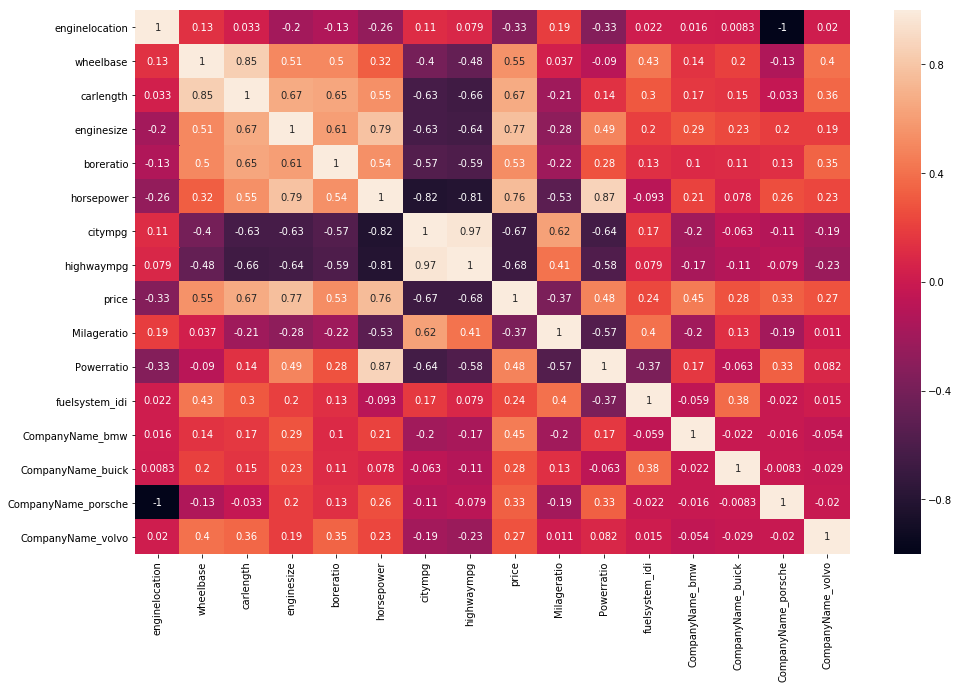

In [713]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(CarModel.corr(),annot = True)

#### Corrleation matrix Observation:
- We have identified that car lenght and Engine size are highly coreleated, Which we got in above VIF and P vlaue analysis.
- Will remove Carlenght first

### Dropping the Variable and Updating the Model

In [714]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carlength', 1)

#### Model-3 with 14 Variable

In [715]:
# Create a third fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [716]:
#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     92.64
Date:                Mon, 13 Aug 2018   Prob (F-statistic):           2.61e-51
Time:                        17:49:45   Log-Likelihood:                 191.30
No. Observations:                 119   AIC:                            -354.6
Df Residuals:                     105   BIC:                            -315.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4051    

In [717]:
# Calculating Vif value after dropping Car length
vif_cal(input_data=CarModel.drop(["carlength"], axis=1), dependent_col="price")

,Var,Vif
5,citympg,515.90
6,highwaympg,408.61
0,enginelocation,147.43
4,horsepower,47.26
7,Milageratio,42.99
8,Powerratio,21.16
2,enginesize,6.69
1,wheelbase,3.42
9,fuelsystem_idi,2.28
12,CompanyName_porsche,2.20


EngineSize is still having high P vlaue and VIF value so will drop it

### Dropping the Variable and Updating the Model

In [719]:

# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('enginesize', 1)

ValueError: labels ['enginesize'] not contained in axis

#### Model-4 with 13 Variable

In [720]:
# Create a fourth fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

In [721]:
#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     99.27
Date:                Mon, 13 Aug 2018   Prob (F-statistic):           6.77e-52
Time:                        17:57:08   Log-Likelihood:                 190.18
No. Observations:                 119   AIC:                            -354.4
Df Residuals:                     106   BIC:                            -318.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3976    

In [723]:
# Calculating Vif value
vif_cal(input_data=CarModel.drop(["enginesize","carlength"], axis=1), dependent_col="price")

,Var,Vif
4,citympg,467.54
5,highwaympg,361.66
0,enginelocation,144.63
6,Milageratio,38.22
3,horsepower,21.49
7,Powerratio,14.49
1,wheelbase,3.40
8,fuelsystem_idi,2.25
11,CompanyName_porsche,2.20
2,boreratio,2.03


- CompanyName_Volvo have VIF less but high P value so will drop it

### Dropping the Variable and Updating the Model

In [724]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('CompanyName_volvo', 1)

#### Creating 5th Model with 12 variables

In [725]:
# Create a Fifth fitted model
lm_4 = sm.OLS(y_train,X_train).fit()

In [726]:
#Let's see the summary of our fourth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 13 Aug 2018   Prob (F-statistic):           3.96e-52
Time:                        18:00:05   Log-Likelihood:                 188.13
No. Observations:                 119   AIC:                            -352.3
Df Residuals:                     107   BIC:                            -318.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3836    

In [728]:
# Calculating Vif value
vif_cal(input_data=CarModel.drop(["CompanyName_volvo","enginesize","carlength"], axis=1), dependent_col="price")

,Var,Vif
4,citympg,466.79
5,highwaympg,361.45
0,enginelocation,140.77
6,Milageratio,38.22
3,horsepower,21.41
7,Powerratio,14.49
1,wheelbase,3.11
11,CompanyName_porsche,2.17
8,fuelsystem_idi,2.16
2,boreratio,1.96


### Dropping the Variable and Updating the Model

In [55]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('semi-furnished', 1)

In [56]:
# Create a fifth fitted model
lm_5 = sm.OLS(y_train,X_train).fit()

In [57]:
#Let's see the summary of our fifth linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 10 Aug 2018   Prob (F-statistic):           2.73e-84
Time:                        22:23:04   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [58]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


### Dropping the Variable and Updating the Model

In [59]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('basement', 1)

In [60]:
# Create a sixth fitted model
lm_6 = sm.OLS(y_train,X_train).fit()

In [61]:
#Let's see the summary of our sixth linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Fri, 10 Aug 2018   Prob (F-statistic):           3.13e-84
Time:                        22:24:53   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [62]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


#### Assessment  question
#### Design four models by dropping all the variables one by one with high vif (>5). Then, compare the results.

## Making Predictions Using the Final Model

### Prediction with Model 5

In [733]:
# Adding  constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [734]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m5 = X_test_m5.drop(["CompanyName_volvo","enginesize","carlength"], axis=1)

In [735]:
# Making predictions
y_pred_m5 = lm_4.predict(X_test_m5)

ValueError: shapes (52,62) and (13,) not aligned: 62 (dim 1) != 13 (dim 0)

## Model Evaluation

Text(0,0.5,'Housing Price')

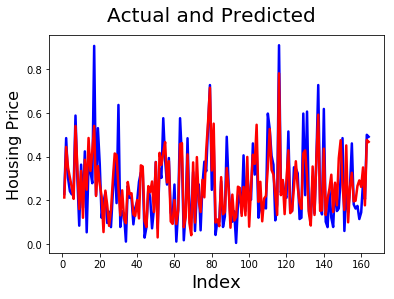

In [66]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m6, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

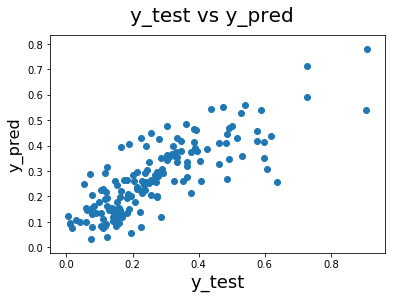

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

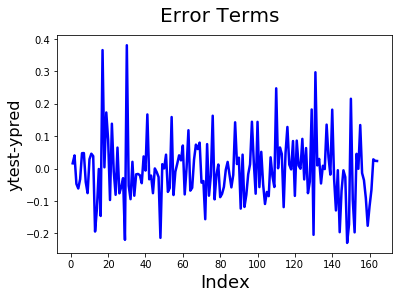

In [68]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

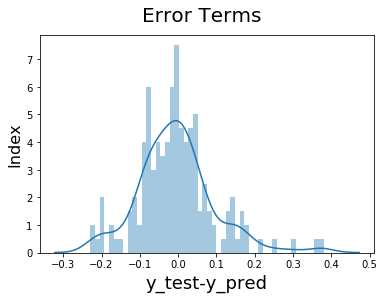

In [69]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [70]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))

RMSE : 0.10001092336807832
